# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [9]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as mp
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [3]:
# setting each station name and their url
nangon=requests.get("https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68")
soup_nan=BeautifulSoup(nangon.text,"html.parser")

taipei=requests.get("https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490")
soup_taipei=BeautifulSoup(taipei.text,"html.parser")

banchiao=requests.get("https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f")
soup_ban=BeautifulSoup(banchiao.text,"html.parser")

taoyuan=requests.get("https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd")
soup_tao=BeautifulSoup(taoyuan.text,"html.parser")

shinshu=requests.get("https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4")
soup_shin=BeautifulSoup(shinshu.text,"html.parser")

miaoli=requests.get("https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3")
soup_miao=BeautifulSoup(miaoli.text,"html.parser")

taichung=requests.get("https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779")
soup_taichung=BeautifulSoup(taichung.text,"html.parser")

changhua=requests.get("https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e")
soup_chang=BeautifulSoup(changhua.text,"html.parser")

yunlin=requests.get("https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f")
soup_yun=BeautifulSoup(yunlin.text,"html.parser")

chiai=requests.get("https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7")
soup_chiai=BeautifulSoup(chiai.text,"html.parser")

tainan=requests.get("https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814")
soup_tainan=BeautifulSoup(tainan.text,"html.parser")

kaoshung=requests.get("https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356")
soup_kao=BeautifulSoup(kaoshung.text,"html.parser")

In [5]:
# crawler the address of each station
address=[]
a_nan=soup_nan.find("a",class_="google-map-link orange")
add_nan=a_nan.get_text()
address.append(add_nan)

a_taipei=soup_taipei.find("a",class_="google-map-link orange")
add_taipei=a_taipei.get_text()
address.append(add_taipei)

a_ban=soup_ban.find("a",class_="google-map-link orange")
add_ban=a_ban.get_text()
address.append(add_ban)

a_tao=soup_tao.find("a",class_="google-map-link orange")
add_tao=a_tao.get_text()
address.append(add_tao)

a_shin=soup_shin.find("a",class_="google-map-link orange")
add_shin=a_shin.get_text()
address.append(add_shin)

a_miao=soup_miao.find("a",class_="google-map-link orange")
add_miao=a_miao.get_text()
address.append(add_miao)

a_taichung=soup_taichung.find("a",class_="google-map-link orange")
add_taichung=a_taichung.get_text()
address.append(add_taichung)

a_chang=soup_chang.find("a",class_="google-map-link orange")
add_chang=a_chang.get_text()
address.append(add_chang)

a_yun=soup_yun.find("a",class_="google-map-link orange")
add_yun=a_yun.get_text()
address.append(add_yun)

a_chiai=soup_chiai.find("a",class_="google-map-link orange")
add_chiai=a_chiai.get_text()
address.append(add_chiai)

a_tainan=soup_tainan.find("a",class_="google-map-link orange")
add_tainan=a_tainan.get_text()
address.append(add_tainan)

a_kao=soup_kao.find("a",class_="google-map-link orange")
add_kao=a_kao.get_text()
address.append(add_kao)
address

['台北市南港區南港路一段313號',
 '台北市北平西路3號',
 '新北市板橋區縣民大道二段7號',
 '桃園市中壢區高鐵北路一段6號',
 '新竹縣竹北市高鐵七路6號',
 '苗栗縣後龍鎮高鐵三路268號',
 '台中市烏日區站區二路8號',
 '彰化縣田中鎮站區路二段99號',
 '雲林縣虎尾鎮站前東路301號',
 '嘉義縣太保市高鐵西路168號',
 '台南市歸仁區歸仁大道100號',
 '高雄市左營區高鐵路105號']

In [6]:
# crawler the operation hours and ticketing hours of each station
operation_hours=[]
ticketing_hours=[]

o_nan=soup_nan.find("td",class_="gray")
ope_nan=o_nan.get_text().split("：")[1]
operation_hours.append(ope_nan)
t_nan=soup_nan.find_all("td",class_="gray")
tick_nan=t_nan[1].get_text().split("：")[1]
ticketing_hours.append(tick_nan)

o_taipei=soup_taipei.find("td",class_="gray")
ope_taipei=o_taipei.get_text().split("：")[1]
operation_hours.append(ope_taipei)
t_taipei=soup_taipei.find_all("td",class_="gray")
tick_taipei=t_taipei[1].get_text().split("：")[1]
ticketing_hours.append(tick_taipei)

o_ban=soup_ban.find("td",class_="gray")
ope_ban=o_ban.get_text().split("：")[1]
operation_hours.append(ope_ban)
t_ban=soup_ban.find_all("td",class_="gray")
tick_ban=t_ban[1].get_text().split("：")[1]
ticketing_hours.append(tick_ban)

o_tao=soup_tao.find("td",class_="gray")
ope_tao=o_tao.get_text().split("：")[1]
operation_hours.append(ope_tao)
t_tao=soup_tao.find_all("td",class_="gray")
tick_tao=t_tao[1].get_text().split("：")[1]
ticketing_hours.append(tick_tao)

o_shin=soup_shin.find("td",class_="gray")
ope_shin=o_shin.get_text().split("：")[1]
operation_hours.append(ope_shin)
t_shin=soup_shin.find_all("td",class_="gray")
tick_shin=t_shin[1].get_text().split("：")[1]
ticketing_hours.append(tick_shin)

o_miao=soup_miao.find("td",class_="gray")
ope_miao=o_miao.get_text().split("：")[1]
operaion_hours.append(ope_miao)
t_miao=soup_miao.find_all("td",class_="gray")
tick_miao=t_miao[1].get_text().split("：")[1]
ticketing_hours.append(tick_miao)

o_taichung=soup_taichung.find("td",class_="gray")
ope_taichung=o_taichung.get_text().split("：")[1]
operaion_hours.append(ope_taichung)
t_taichung=soup_taichung.find_all("td",class_="gray")
tick_taichung=t_taichung[1].get_text().split("：")[1]
ticketing_hours.append(tick_taichung)

o_chang=soup_chang.find("td",class_="gray")
ope_chang=o_chang.get_text().split("：")[1]
operaion_hours.append(ope_chang)
t_chang=soup_chang.find_all("td",class_="gray")
tick_chang=t_chang[1].get_text().split("：")[1]
ticketing_hours.append(tick_chang)

o_yun=soup_yun.find("td",class_="gray")
ope_yun=o_yun.get_text().split("：")[1]
operaion_hours.append(ope_yun)
t_yun=soup_yun.find_all("td",class_="gray")
tick_yun=t_yun[1].get_text().split("：")[1]
ticketing_hours.append(tick_yun)

o_chiai=soup_chiai.find("td",class_="gray")
ope_chiai=o_chiai.get_text().split("：")[1]
operaion_hours.append(ope_chiai)
t_chiai=soup_chiai.find_all("td",class_="gray")
tick_chiai=t_chiai[1].get_text().split("：")[1]
ticketing_hours.append(tick_chiai)

o_tainan=soup_tainan.find("td",class_="gray")
ope_tainan=o_tainan.get_text().split("：")[1]
operaion_hours.append(ope_tainan)
t_tainan=soup_tainan.find_all("td",class_="gray")
tick_tainan=t_tainan[1].get_text().split("：")[1]
ticketing_hours.append(tick_tainan)

o_kao=soup_kao.find("td",class_="gray")
ope_kao=o_kao.get_text().split("：")[1]
operaion_hours.append(ope_kao)
t_kao=soup_kao.find_all("td",class_="gray")
tick_kao=t_kao[1].get_text().split("：")[1]
ticketing_hours.append(tick_kao)

In [8]:
# create a DataFrame
station=["南港","台北","板橋","桃園","新竹","苗栗","台中","彰化","雲林","嘉義","台南","左營"]
THSR=pd.DataFrame({"station":pd.Series(station),"address":pd.Series(address),"operation_hours":pd.Series(operaion_hours),"ticketing_hours":pd.Series(ticketing_hours)})
THSR

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [12]:
# crawler GDP
table=pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
GDP=table[2]
for i in range(50,213):
    GDP.drop(index=[i],inplace=True)
GDP.columns=GDP.columns.droplevel(0)
GDP.columns=["Country","Region","IMF_Estimate","IMF_Year","United_Nations_Estimate","United_Nations_Year","World_Bank_Estimate","World_Bank_Year"]

In [13]:
# create GDP DataFrame
GDP.loc[[1,20,32,39],"IMF_Year"]=2021
GDP.loc[1,"United_Nations_Year"]=2019
GDP

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271.0,2021,21433226,2019,20936600.0,2020
1,China,Asia,16642318.0,2021,14342933,2019,14722731.0,2020
2,Japan,Asia,5378136.0,2021,5082465,2019,4975415.0,2020
3,Germany,Europe,4319286.0,2021,3861123,2019,3806060.0,2020
4,United Kingdom,Europe,3124650.0,2021,2826441,2019,2707744.0,2020
5,India,Asia,3049704.0,2021,2891582,2019,2622984.0,2020
6,France,Europe,2938271.0,2021,2715518,2019,2603004.0,2020
7,Italy,Europe,2106287.0,2021,2003576,2019,1886445.0,2020
8,Canada,Americas,1883487.0,2021,1741496,2019,1643408.0,2020
9,South Korea,Asia,1806707.0,2021,1646539,2019,1630525.0,2020


In [14]:
# crawler CPI
table_cpi=pd.read_html("https://en.wikipedia.org/wiki/Corruption_Perceptions_Index")
cpi=table_cpi[4]
for i in range(100,180):
    cpi.drop(index=[i],inplace=True)

In [15]:
# CPI DataFrame
Score=cpi["2020[6]","Score"]
Nation=cpi["Nation or Territory","Nation or Territory"]
CPI=pd.DataFrame({"Country":Nation,"CPI_2020":Score})
CPI

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [16]:
# merge GDP and CPI DataFrame
gdp_cpi=pd.merge(GDP,CPI,how="left",on="Country")
gdp_cpi.dropna(inplace=True)
gdp_cpi.reset_index(drop=True,inplace=True)
gdp_cpi

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271.0,2021,21433226,2019,20936600.0,2020,67.0
1,China,Asia,16642318.0,2021,14342933,2019,14722731.0,2020,42.0
2,Japan,Asia,5378136.0,2021,5082465,2019,4975415.0,2020,74.0
3,Germany,Europe,4319286.0,2021,3861123,2019,3806060.0,2020,80.0
4,United Kingdom,Europe,3124650.0,2021,2826441,2019,2707744.0,2020,77.0
5,India,Asia,3049704.0,2021,2891582,2019,2622984.0,2020,40.0
6,France,Europe,2938271.0,2021,2715518,2019,2603004.0,2020,69.0
7,Italy,Europe,2106287.0,2021,2003576,2019,1886445.0,2020,53.0
8,Canada,Americas,1883487.0,2021,1741496,2019,1643408.0,2020,77.0
9,South Korea,Asia,1806707.0,2021,1646539,2019,1630525.0,2020,61.0


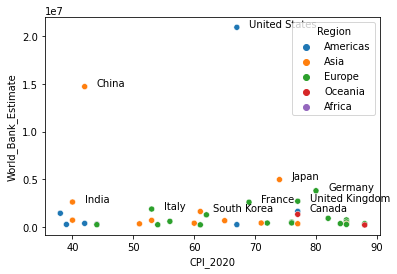

In [17]:
# plot
mp.figure(figsize=(6,4))
sns.scatterplot(x=gdp_cpi["CPI_2020"],y=gdp_cpi["World_Bank_Estimate"],hue=gdp_cpi["Region"])
gdp_cpi.loc[1,"CPI_2020"]
for i in range(0,10):
    mp.text(x=gdp_cpi.loc[i,"CPI_2020"]+2,y=gdp_cpi.loc[i,"World_Bank_Estimate"],s=gdp_cpi.loc[i,"Country"],fontsize=10)